In [19]:
import pandas as pd
import numpy as np
import requests
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
fastfood_us_df = pd.read_csv("US_fastfood_restaurant_review.csv")

In [21]:
fastfood_us_df

,name,country,latitude,longitude,Street Adress,price_level,rating,user_ratings_total,province,state
0,Sonic Drive-In,US,29.814697,-90.814742,"800 N Canal Blvd, Thibodaux, LA 70301",1.0,4.3,479.0,Thibodaux,LA
1,Taco Bell,US,35.803788,-83.580553,"206 Wears Valley Rd, Pigeon Forge, TN 37863",1.0,3.3,1029.0,Pigeon Forge,TN
2,Arby's,US,35.782339,-83.551408,"3652 Parkway, Pigeon Forge, TN 37863",1.0,3.9,1620.0,Pigeon Forge,TN
3,Steak 'n Shake,US,33.562738,-84.321143,"2118 Mt Zion Parkway, Morrow, GA 30260",1.0,3.4,5287.0,Morrow,GA
4,Wendy's,US,42.368823,-83.138251,"9768 Grand River Ave, Detroit, MI 48204",1.0,3.6,1560.0,Detroit,MI
...,...,...,...,...,...,...,...,...,...,...
7652,Pizza Hut,US,36.078802,-80.387508,"5062 Styers Ferry Rd, Lewisville, NC 27023",1.0,3.6,230.0,Lewisville,NC
7653,Pizza Hut,US,36.117563,-80.316553,"3460 Robinhood Rd, Winston-Salem, NC 27106",2.0,4.5,387.0,Winston-Salem,NC
7654,Pizza Hut,US,36.077718,-80.176748,"3069 Kernersville Rd, Winston-Salem, NC 27107",1.0,4.6,1488.0,Winston-Salem,NC
7655,Pizza Hut,US,36.111015,-80.089165,"838 S Main St, Kernersville, NC 27284",1.0,3.2,644.0,Kernersville,NC


In [22]:
fastfood_us_df['name']=fastfood_us_df['name'].replace({"Chick-Fil-A":'Chick-fil-A'
                                          })

In [23]:
fastfood_us =fastfood_us_df.dropna()

In [24]:
threshold = 16 # Anything that occurs less than this will be removed.
value_counts = fastfood_us['name'].value_counts() # Entire DataFrame 
to_remove = value_counts[value_counts <=threshold].index
fastfood_us.replace(to_remove, np.nan, inplace=True)

fastfood_us=fastfood_us.dropna()

fastfood_us['name'].value_counts()

McDonald's                1628
Taco Bell                  876
Burger King                711
Subway                     654
Arby's                     569
Wendy's                    531
Jack in the Box            290
Chick-fil-A                194
Pizza Hut                  180
Domino's Pizza             175
Dairy Queen                172
Sonic Drive-In             170
KFC                        155
Carl's Jr.                 108
Jimmy John's               102
Hardee's                    96
Krystal                     68
Panera Bread                63
Culver's                    63
Dunkin' Donuts              59
Del Taco                    55
Steak 'n Shake              49
SUBWAY                      49
In-N-Out Burger             47
Taco John's                 44
Panda Express               43
Long John Silver's          43
Checkers                    36
Whataburger                 36
Waffle House                35
Boston Market               33
Chipotle Mexican Grill      33
Bojangle

In [25]:
fastfood_us['rating'] = fastfood_us['rating'].astype(float)
fastfood_us.dtypes



name                   object
country                object
latitude              float64
longitude             float64
Street Adress          object
price_level           float64
rating                float64
user_ratings_total    float64
province               object
state                  object
dtype: object

In [26]:
state_rating_average = fastfood_us.groupby(['name','state'])['rating'].mean()

In [27]:
state_restaurant_total=fastfood_us.groupby(['name','state'])['user_ratings_total'].sum()

In [28]:
overview = pd.DataFrame({
    "state rating average": state_rating_average,
    "state restaurant total": state_restaurant_total,
    })

In [29]:
overview

state rating average  state restaurant total
name            state                                              
Arby's          AK                 3.900000                   390.0
                AR                 4.016667                  3798.0
                AZ                 4.053333                 11471.0
                CA                 4.112500                 11056.0
                CO                 3.908333                 10757.0
...                                     ...                     ...
White Castle    PA                 3.800000                  3862.0
                TN                 4.600000                   193.0
Wienerschnitzel AZ                 4.233333                  4233.0
                CA                 4.073684                 10123.0
                TX                 4.225000                  6039.0

[827 rows x 2 columns]

In [30]:
overview=overview.reset_index(drop=False)

In [31]:
overview=overview.rename(columns={'name':'Restaurant'})

In [32]:
a= overview[overview["Restaurant"] == "McDonald's"]['state rating average'].idxmax() #HI
b=overview[overview["Restaurant"] == "McDonald's"]['state rating average'].idxmin() #NE
c=overview[overview["state"] == "HI"]['state rating average'].idxmin()
d=overview[overview["state"] == "UT"]['state rating average'].idxmax()

In [33]:
print(a)
print(b)
print(c)
print(d)

443
475
79
547


In [34]:
aa=overview.loc[(a)]
bb=overview.loc[(b)]
cc=overview.loc[(c)]
dd=overview.loc[(d)]

In [35]:
aaa=pd.DataFrame(aa)
aaa=aaa.transpose()
bbb=pd.DataFrame(bb)
bbb=bbb.transpose()
ccc=pd.DataFrame(cc)
ccc=ccc.transpose()
ddd=pd.DataFrame(dd)
ddd=ddd.transpose()

In [36]:
eee=aaa.append(bbb)
eee=eee.append(ccc)
eee=eee.append(ddd)
eee

C:\Users\shupe\AppData\Local\Temp\ipykernel_9400\1666942915.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eee=aaa.append(bbb)
C:\Users\shupe\AppData\Local\Temp\ipykernel_9400\1666942915.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eee=eee.append(ccc)
C:\Users\shupe\AppData\Local\Temp\ipykernel_9400\1666942915.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eee=eee.append(ddd)


,Restaurant,state,state rating average,state restaurant total
443,McDonald's,HI,4.02,5101.0
475,McDonald's,UT,3.0375,6538.0
79,Burger King,HI,3.3,668.0
547,Pizza Hut,UT,4.6,552.0


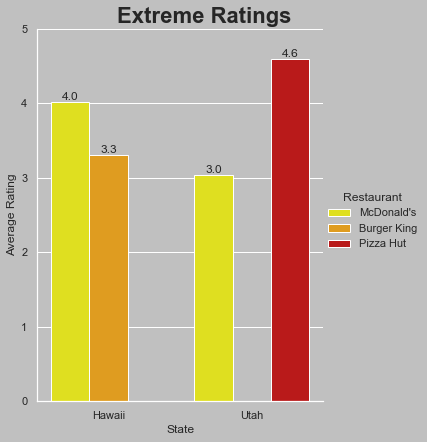

In [81]:
sns.set(rc={'axes.facecolor':'Silver', 'figure.facecolor':'Silver'})
sra_plot=sns.catplot(x="state",y='state rating average', hue="Restaurant",data=eee,kind='bar',height=6,aspect=.8,palette=['#FFFF00',"#FFA500","#D30000"])
sra_plot.set_axis_labels("State","Average Rating")
sra_plot.set_xticklabels(['Hawaii','Utah'])
sra_plot.set(ylim=(0,5))
ax = sra_plot.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height() / 1):.1f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
sra_plot.fig.suptitle("Extreme Ratings",ha='center',va='top',y=1.02,size=22,fontweight='bold')
sra_plot.savefig("Extreme Rating.png",bbox_inches='tight',dpi=1920)


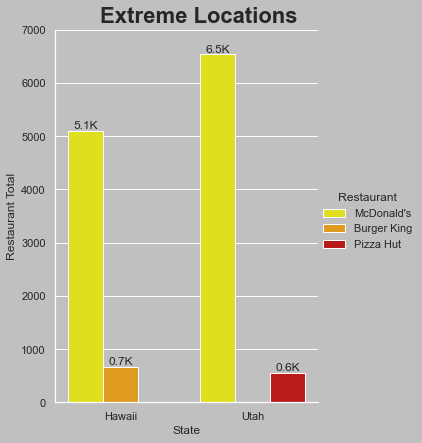

In [75]:
srt_plot=sns.catplot(x="state",y='state restaurant total', hue="Restaurant",data=eee,kind='bar',height=6,aspect=.8,palette=['#FFFF00',"#FFA500","#D30000"])
srt_plot.set_axis_labels("State","Restaurant Total")
srt_plot.set_xticklabels(['Hawaii','Utah'])
srt_plot.set(ylim=(0,7000))
srt_plot.fig.suptitle("Extreme Locations",ha='center',va='center',y=1,size=22,fontweight='bold')
ax = srt_plot.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
srt_plot.savefig("Extreme Locations.png",bbox_inches='tight',dpi=1920)

In [57]:
overview_scatter=overview[overview['Restaurant'].isin(["McDonald's","Burger King","Chick-fil-A"])]

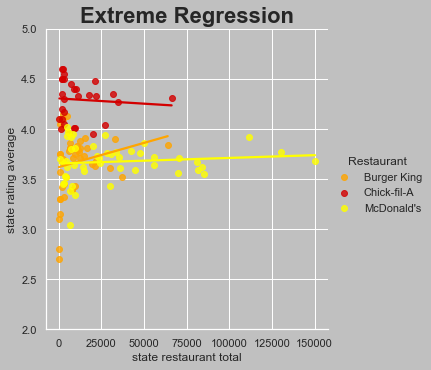

In [87]:
extreme_regression=sns.lmplot(x='state restaurant total',y="state rating average",hue="Restaurant",data=overview_scatter,ci=None,palette=["#FFA500","#D30000",'#FFFF00'],fit_reg=True)
plt.title("Extreme Regression",size=22,fontweight="bold")
extreme_regression.set(ylim=(2,5))
extreme_regression.figure.savefig("Extreme Regression.png",bbox_inches='tight',dpi=1920)

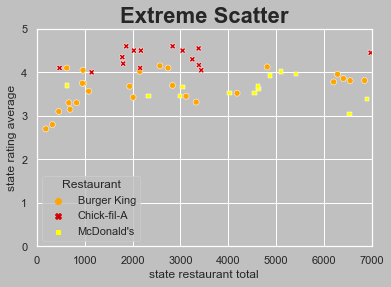

In [84]:
extreme_scatter=sns.scatterplot(data=overview_scatter,x="state restaurant total",y="state rating average",hue="Restaurant",style="Restaurant",palette=["#FFA500","#D30000",'#FFFF00'],legend="auto",)
extreme_scatter.set_title("Extreme Scatter")
extreme_scatter.grid(visible='true')
extreme_scatter.set(xlim=(0,7000))
extreme_scatter.set(ylim=(0,5))
plt.title("Extreme Scatter",size=22,fontweight="bold")
extreme_scatter.figure.savefig("Extreme Scatter.png",bbox_inches='tight',dpi=1920)